#### Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the Boston House Pricing Dataset. 

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### Preparing the dataset

In [7]:
dataset = pd.DataFrame(boston.data, columns= boston.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
## Adding the target feature column.
dataset["Price"] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Performing exploratory data analysis

In [12]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
## Check the missing values.
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
## Checking the correlation between the features in the dataset.
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


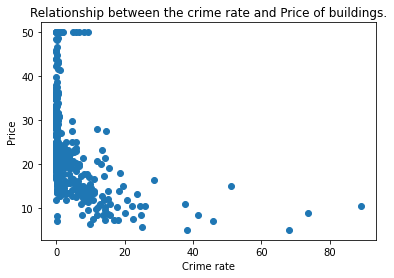

In [17]:
## Checking the relationship between crime and price
plt.scatter(dataset["CRIM"], dataset["Price"])
plt.xlabel("Crime rate")
plt.ylabel("Price")
plt.title("Relationship between the crime rate and Price of buildings.")
plt.show()

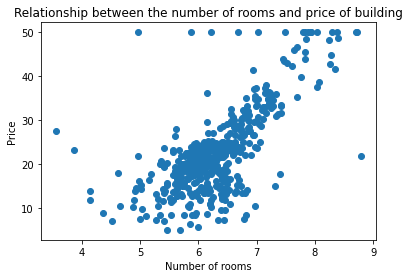

In [18]:
### Checking the relationship between the number of rooms and price of house
plt.scatter(dataset["RM"], dataset["Price"])
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.title("Relationship between the number of rooms and price of building")
plt.show()

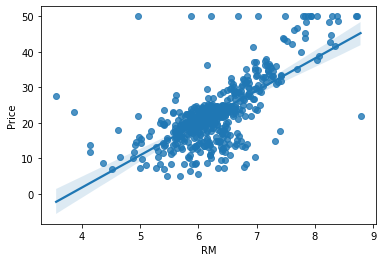

In [20]:
## Making a regression plot
sns.regplot(x="RM", y="Price", data=dataset);

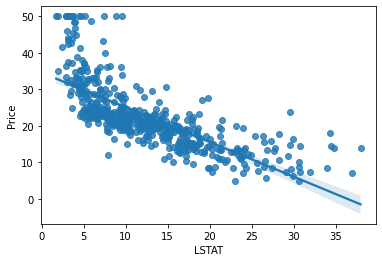

In [21]:
sns.regplot(x="LSTAT", y="Price", data=dataset);

#### Making independent and dependent features

In [22]:
X = dataset.iloc[:, :-1]
y = dataset["Price"]

#### Split the data into training and test splits

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#### Standardizing the dataset.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
## Scaling the training dataset
X_train = scaler.fit_transform(X_train)

## Scaling the test_dataset
X_test = scaler.transform(X_test)

#### Model training

In [26]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [27]:
## Training
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
## Print the coefficients and the intercepts

print("Coefficients:")
print(regression.coef_)

print(".......................................................................................")

print("Intercept: ", regression.intercept_)

Coefficients:
[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
.......................................................................................
Intercept:  23.01581920903955


In [29]:
## Prediction with test data
reg_preds = regression.predict(X_test)

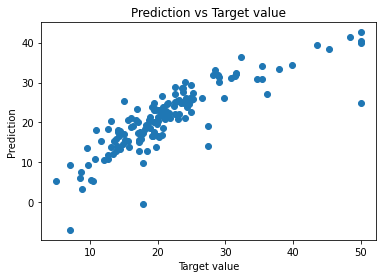

In [30]:
## Plot a scatter plot for the prediction.
plt.scatter(y_test, reg_preds)
plt.title("Prediction vs Target value")
plt.xlabel("Target value")
plt.ylabel("Prediction")
plt.show()

In [31]:
## Calculating residuals
residuals = y_test - reg_preds

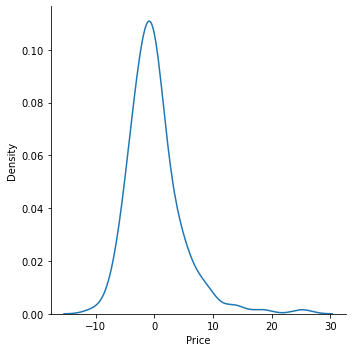

In [33]:
## Plotting residuals
sns.displot(residuals, kind="kde");

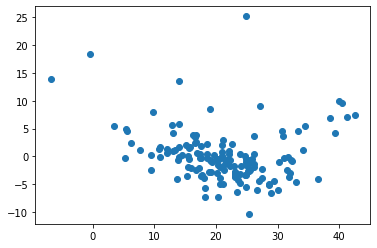

In [34]:
## Scatterplot of residuals and predictions

plt.scatter(reg_preds, residuals)

#### Evaluating the model.

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
print("Mean squared error: ", mean_squared_error(y_test, reg_preds))
print("Mean absolute error: ", mean_absolute_error(y_test, reg_preds))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, reg_preds)))

Mean squared error:  21.517444231177205
Mean absolute error:  3.162709871457405
RMSE:  4.6386899261728205


#### Using R-squared and Adjusted R-squared

In [41]:
from sklearn.metrics import r2_score

print("R-squared: ", r2_score(y_test, reg_preds))

R-squared:  0.7112260057484933


In [42]:
def adjusted_r2(score):
    """
    Returns adjusted r2_score.
    """
    return 1-(1-score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

In [43]:
print("Adjusted R-squared: ", adjusted_r2(r2_score(y_test, reg_preds)))

Adjusted R-squared:  0.6840226584639311


#### Saving the model.

In [44]:
import pickle

In [45]:
pickle.dump(regression, open("regmodel.pkl", "wb"))